##### ---   
 <img align="left" width="75" height="75"  src="https://upload.wikimedia.org/wikipedia/en/c/c8/University_of_the_Punjab_logo.png"> 

<h1 align="center">Department of Data Science</h1>
<h1 align="center">Course: Tools and Techniques for Data Science</h1>

---
<h3><div align="right">Instructor: Muhammad Arif Butt, Ph.D.</div></h3>    

<h1 align="center">Lecture 4.2 (Inferential Statistics)</h1><br>
<a href="https://colab.research.google.com/github/arifpucit/data-science/blob/master/Section-4-Mathematics-for-Data-Science/Lec-4.2%20(Inferential-Statistics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" width="350" height="300"  src="images/ds1.png"  >
<img align="center" width="400" height="250"  src="images/mathsandstat.jpeg"  >

<img align="center" width="900" height="250"  src="images/mathimg1.png"  >

<img align="centre" width="900" height="900"  src="images/di.png"  >

In [ ]:
# Unlike the other modules, we have been working so far, you have to download and install...
# To install this library in Jupyter notebook
import sys
!{sys.executable} -m pip install -q --upgrade pip
!{sys.executable} -m pip install -q statistics statsmodels scipy

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import math as m
import statistics
import scipy.stats as st
import statsmodels as sm

## Learning agenda of this notebook

**Section 1: (Overview of Probability for Machine Learning)**
1. Overview of Probability
    - Probability Basics
    - Joint Probability
    - Combinatorics
    - The Law of Large Numbers
    - Practical Implementation in Python
2. Conditional Probability, Bayes’ Theorem and Naive Bayes' Classifier
3. How Probability Relates with Statistics
4. Probability Distributions
    - Continuous Probability Distributions (Normal, Standard Normal, Log Normal, Exponential, Student’s T, Chi-square)
    - Discrete Probability Distributions (Binomial, Bernoulli, Multinomial, Poisson)
5. Central Limit Theorem

**Section 2: (Hypothesis Testing)**
1. Overview of Hypothesis Testing
    - How to formulate a Hypothesis?
    - Types of Hypotheshis Tests.
    - Related Terminologies (Rejection region, significance level, confidence intervals, test scores, p-value, and error types)
2. Z-Test vs T-Test
3. Student's Single Sample T-Test
4. Student's Two Samples T-Test
    - Independent Samples
    - Paired Samples

**Section 3: (Journey from Variance -> Covariance -> Correlation -> Regression)**
1. A Recap
    - Variance and Standard Deviation
    - Covariance and Covariance Matrix
    - Correlation and Correlation Matrix
    - Regression
2. Regression Analysis
3. Linear Regression
    - Fitting a Line using Gradiant Descent
    - Fitting a Line using Linear Least Squares (with one feature)

# <span style='background :lightgreen' > Section 1: (Overview of Probability for Machine Learning) </span>

## 1. A Recap of Basic Probability Concepts

<img align="right" width="450" height="150"  src="images/prob1.png"  >

### a. Probability Basics
- Probability theory is a branch of mathematics concerned with the analysis of random phenomena, and defines the `likelihood of occurrence of an event`. 
- Probability can be defined as the ratio of the number of favorable outcomes to the total number of outcomes of an event.

$$ P(\text{event}) = \frac{\text{# of outcomes of event}}{\text{# of outcomes in }\Omega} $$

- The value of the probability of an event to happen can lie between 0 and 1 because the favorable number of outcomes can never cross the total number of outcomes. 
- To understand Probability, we normally start to predict the outcomes for the `tossing of coins`, `rolling of dice`, or `drawing a card from a pack of playing cards`. Later we apply the same concepts in the domains of Artificial Intelligence and Machine Learning.

- **Independent Event** is an event that does not impact the other. For example, rolling a dice twice and getting two sixes in a sequence (1/6 times 1/6)
- **Dependent event** is an event that impact the other. For Example, drawing two cards from a pack of playing cards without replacement and getting two queens in a sequence. (4/52 times 3/52)

<img align="center" width="400" height="200"  src="images/prob.gif"  > 

- **Example:**
If we're only flipping the coin once, then there are only two possible outcomes in the sample space $\Omega$: it will either be H or T (using set notation, we could write this as $\Omega$ = {H, T}).
Therefore: $$ P(H) = \frac{1}{2} = 0.5 $$
Equally: $$ P(T) = \frac{1}{2} = 0.5 $$

- **Example:** Consider drawing a single card from a standard deck of 52 playing cards. In this case, the number of possible outcomes in the sample space $\Omega$ is 52. 
There is only one `ace of spades` in the deck, so the probability of drawing it is: $$ P(\text{ace of spades}) = \frac{1}{52} \approx 0.019 $$
In contrast there are four `aces`, so the probability of drawing an ace is: $$ P(\text{ace}) = \frac{4}{52} \approx 0.077 $$

- **More Examples:**
$$ P(\text{spade}) = \frac{13}{52} = 0.25 $$
$$ P(\text{ace OR spade}) = \frac{16}{52} \approx 0.307 $$
$$ P(\text{card}) = \frac{52}{52} = 1 $$
$$ P(\text{apple}) = \frac{0}{52} = 0 $$

### b. Joint Probability (Independent Events)
- Joint probability is the probability of two events happening at the same time.
- If two events A and B are indpendent, and we want to find the probability of the intersection of these events (i.e., probability of both A and B happening together), we can use the "Probability rule of Product":
##### <center> `P (A ∩ B) = P(A) . P(B)` </center>

- Some real life examples of independent events are: Scoring good marks in an exam has no effect on what the neighbors are up to. Similarly, taking a cab to market has no effect on finding your favorite movie on Youtube.

**Notee:** To calculate the probability of intersection of dependent events, we use conditional probability (later).


- **Example:** The probability of getting `two consecutive heads` from two tosses ($\Omega$ = {HH, HT, TH, TT}) is: $$ P(\text{HH}) = \frac{1}{4} = 0.25 $$
- **Example:** The probability of getting `three consecutive heads` from three tosses ($\Omega$ = {HHH, HHT, HTH, THH, HTT, THT, TTH, TTT}) is: $$ P(\text{HHH}) = \frac{1}{8} = 0.125 $$
- **Example:** The probability of getting `exactly two heads` from three tosses ($\Omega$ = {HHH, HHT, HTH, THH, HTT, THT, TTH, TTT}) is: $$ P(\text{event}) = \frac{3}{8} = 0.375 $$
- **Example:** The probability of getting `at least two heads` from three tosses ($\Omega$ = {HHH, HHT, HTH, THH, HTT, THT, TTH, TTT}) is: $$ P(\text{event}) = \frac{4}{8} = 0.5 $$

- **Example:** To calculate the probability of throwing three consecutive heads from three tosses. We can take the product of the probabilities of getting a single head from a single toss and getting two heads from two tosses: $$ P(\text{HHH}) = P(\text{H}) \times P(\text{HH}) = \frac{1}{2} \times \frac{1}{4} = \frac{1}{8} \approx 0.125 $$

- **Example:** So to calculate the probability of throwing five consecutive heads from five tosses, without creating the sample set of 32 possible events. We take the product of probabilities we've already calculated: $$ P(\text{HHHHH}) = P(\text{HH}) \times P(\text{HHH}) = \frac{1}{4} \times \frac{1}{8} = \frac{1}{32} \approx 0.031 $$
- **Example:** Similarly to calculate the probability of throwing 10 consecutive heads from ten tosses, without creating the sample set of 1024 possible events. We take the product of probabilities we've already calculated: $$ P(\text{HHHHHHHHHH}) = P(\text{HHHHH}) \times P(\text{HHHHH}) = \frac{1}{32} \times \frac{1}{32} = \frac{1}{1024} \approx 0.000976 $$

>**What is the probability of getting 5 consecutive heads from 100 tosses?**
>   - I know the total sample space will be 2^100
>   - Can you tell me the count of favourable outcomes?

### c. Combinatorics

- Combinatorics is a field of mathematics devoted to counting that can be helpful to studying probabilities. We can use `factorials` (e.g., $4! = 4 \times 3 \times 2 \times 1 = 24$), which feature prominently in combinatorics, to calculate probabilities instead of painstakingly determining all of the members of the sample space $\Omega$ and counting subsets within $\Omega$. 

- More specifically, we can calculate the number of outcomes of an event using the "number of combinations" equation: $$ {n \choose k} = \frac{n!}{k!(n - k)!} $$

- The left-hand side of the equation is read "$n$ choose $k$". Consider three coin flips, $n = 3$ and if we're interested in the number of ways to get exactly two heads (may not be consecutive), $k = 2$. We would read this as "3 choose 2" and calculate it as:
$$ {n \choose k} = {3 \choose 2} = \frac{3!}{2!(3 - 2)!} = \frac{3!}{(2!)(1!)} = \frac{3 \times 2 \times 1}{(2 \times 1)(1)} = \frac{6}{(2)(1)} = \frac{6}{2} = 3 $$

This provide us with the numerator for event-probability equation from above: $$ P(\text{event}) = \frac{\text{# of outcomes of event}}{\text{# of outcomes in }\Omega} $$

In the case of coin-flipping (or any binary process with equally probable outcomes), the denominator can be calculated with $2^n$ (where $n$ is again the number of coin flips), so: $$ \frac{\text{# of outcomes of event}}{\text{# of outcomes in }\Omega} = \frac{3}{2^n} = \frac{3}{2^3} = \frac{3}{8} = 0.375 $$

**Example**:  Use $n \choose k$ to calculate the probability of throwing exactly three heads in five coin tosses.

$$ {n \choose k} = {5 \choose 3} = \frac{5!}{3!(5 - 3)!} = \frac{5!}{(3!)(2!)} = \frac{5 \times 4 \times 3 \times 2 \times 1}{(3 \times 2 \times 1)(2 \times 1)} = \frac{120}{(6)(2)} = \frac{120}{12} = 10 $$

$$P = \frac{10}{2^n} = \frac{10}{2^5} = \frac{10}{32} = 0.3125 $$

### d. Practice above Concepts with Python

In [2]:
def prob_calc(n, k):
#    num = m.factorial(n)/(m.factorial(k) * m.factorial(n-k))
    num =  m.comb(n,k)
    den = 2**n
    rv = num/den
    return rv

In [3]:
# In ten tosses what is the probability of getting exactly two heads
print("prob_calc(10, 2): ", prob_calc(10, 2))
# In ten tosses what is the probability of getting exactly 5 head
print("prob_calc(10, 5): ", prob_calc(10, 5))

prob_calc(10, 2):  0.0439453125
prob_calc(10, 5):  0.24609375


In [ ]:
# Probabilities of getting 0,1,2,3,...10 heads in ten tosses
for i in range(0,11):
    print (prob_calc(10,i), end=', ')

In [ ]:
# Use list comprehension to iterate this function on values 0 to 5
probabilities = [prob_calc(10, h) for h in range(11)]
print(probabilities)

>- This shows that in a ten coin toss experiment, there is less than 1% chance that we'll get all heads, while the probability of getting five heads is 24.6%

### 2. The Law of Large Numbers

The **law of large numbers** states that the more experiments we run, the closer we will tend to get to the expected probability. 

In [ ]:
# The binomial() method is used to draw samples from a binomial distribution
# where n is the number of flips and p is the probability.
#np.random.seed(54) # for reproducibility
np.random.binomial(n=4, p=0.5)

In [5]:
# Let me increase the count of experiments to ten thousands
np.random.binomial(n=10000, p=0.5)

4968

In [4]:
ne = np.array([1, 2, 3, 4, 5, 6, 7,  2**15, 2**16, 2**17, 2**18]) 

heads_count = [np.random.binomial(n=a, p=0.5) for a in ne]

proportion_heads = heads_count/ne
print(proportion_heads)

[1.         0.5        0.33333333 0.75       0.4        0.83333333
 0.71428571 0.49966431 0.49890137 0.4992218  0.49795914]


> **Note:** Above are the probabilities. This comply to the Law of Large Numbers which says that "as we increase the number of coin tosses, the probability of getting heads gets closer and closer to 50%. 

- **Gambler's Fallacy**. It is a common misconception that the law of large numbers dictates that if, say, five heads have been flipped in a row, then the probability of tails is higher on the sixth flip. In fact, probability theory holds that each coin flip is completely independent of all others. Thus, every single flip of a fair coin has a 50% chance of being heads, no matter what happened on preceding flips.

## 3. Conditional Probability and Bayes’ Theorem

### a. Conditional Probability
- **Marginal Probability:** The probability of an event irrespective of the outcomes of other random variables, e.g. $P(A)$.


- **Joint Probability:** Joint probability measures the probability of two more events occurring together and at the same time. The joint probability is also called the intersection of two or more events. We can represent this relation using a Venn diagram as well. For two events A and B, it is denoted by P (A ∩ B) or P(A, B)

\begin{equation}
   P(A \cap B) \hspace{0.5cm} = \hspace{0.5cm} P(A) \times P(B)  \hspace{0.5cm}
\end{equation}
    
    - where the probability rule of product is used to find the probability of intersection of events. An important requirement of the rule of product is that the events should be independent. If one were to calculate the probability of an intersection of dependent events, then a different approach involving conditional probability would be needed.


- **Conditional probability:** is the probability of an event A given that event B has already happened. This is formally written as P(A|B), which reads as: the probability of A given B. It can be calculated with the following formula:

\begin{equation}
    P(A \mid B) = \frac{P(A \cap B)}{P(B)} \hspace{0.5cm} = \frac{P(A) \times P(B)}{P(B)}  \hspace{0.5cm}
\end{equation}

**Example 1:**
- Consider the following three events:
    - Event-A: Student getting A-Grade in exam
    - Event-B: Student studied 5 hours daily for entire semester
    - Event-C: Student studied only 1 hour before the exam
- Suppose \begin{equation} P(A) = 0.15\end{equation}

- Now it is natural that:

\begin{equation}
    P(A \mid B) >= 0.15 \hspace{0.5cm} and  \hspace{0.5cm}   P(A \mid C) <= 0.15
\end{equation}

**Example 2:**
- Consider the following two events:
    - Event-B: Card drawn from a deck of cards is a face card
    - Event-A: Without replacement the second card drawn from the same deck of cards is a face card
\begin{equation} P(B) = \frac{12}{52} \end{equation}
\begin{equation} P(A) = \frac{11}{51} \end{equation}

\begin{equation}
    P(A \mid B) = \frac{P(A \cap B)}{P(B)}
\end{equation}

\begin{equation}
\hspace{0.5cm}     P(A \mid B) = \frac{P(A) \times P(B)}{P(B)} 
\end{equation}

\begin{equation}
\hspace{0.5cm}    P(A \mid B) = \frac{\frac{11}{51} \times \frac{12}{52}}{\frac{12}{52}}
\end{equation}
\begin{equation}
\hspace{0.5cm}    P(A \mid B)  \approx 0.216 
\end{equation}

- **Example 3:** Similarly, your probability of getting a parking space is connected to the time of day you park, where you park, and what conventions are going on at any time. 

### b. Bayes’ Theorem
- **Bayes' Theorem** (by Thomas Bayes), is a way of calculating a conditional probability without the joint probability
- To calculate the probability that event A occurs, given that event B has already occurred, we can use the following **Conditional Probability** formula:

\begin{equation}
    P(A \mid B) = \frac{P(A \cap B)}{P(B)} \hspace{0.5cm} ------(i)
\end{equation}

- Similarly, to calculate the probability that event B occurs, given that event A has already occurred, we can use the same formula, only this time changing out the denominator as follows:
\begin{equation}
    P(B \mid A) = \frac{P(B \cap A)}{P(A)} \hspace{0.9cm} OR \hspace{0.9cm}  P(B \mid A) = \frac{P(A \cap B)}{P(A)} \hspace{0.5cm}------(ii)
\end{equation}

- Multiplying both sides of equation $(i)$ by $P(B)$ gives us
\begin{equation}
    P(A \mid B) * P(B) = P(A \cap B) \hspace{0.5cm} ------(iii)
\end{equation}


- Similarly, multiplying both sides of equation $(ii)$ by $P(A)$ gives us
\begin{equation}
    P(B \mid A) * P(A) = P(A \cap B) \hspace{0.5cm} ------(iv)
\end{equation}

- Equating equations $(iii)$ and $(iv)$, we get
\begin{equation}
P(A \mid B) * P(B) \hspace{0.5cm} = \hspace{0.5cm}  P(B \mid A) * P(A)  \hspace{0.5cm}
\end{equation}

\begin{equation}
    P(A \mid B) \hspace{0.5cm} = \hspace{0.5cm} \frac{P(B \mid A) * P(A)}{P(B)}, \hspace{0.5cm} P(B)\neq 0 \hspace{0.5cm} ------(v)
\end{equation}

- Where:
    - **P(A|B) is Posterior Probability:** Probability of an event that is calculated after all the information related to the event has been accounted for. (Also known as conditional probability).
    - **P(B|A) is Liklihood:** Reverse of the posterior probability.
    - **P(A) is Prior Probability:** Probability of an event that is calculated before considering the new information obtained.
    - **P(B) is Evidence:** Also known as normalization constant.

- Note that the only difference between equation $(v)$ that defines Bayes' Theorem and equation $(i)$ that defines  conditional probability, is the numerator on the right-hand side of the equation. In conditional probability, we see   $P(A∩B)$ in the numerator, whereas in Bayes' theorem, we see $P(B|A)∗P(A)$ in the numerator.


###  Examples of Bayes' Theorem

- **Example 1:** What is the probability that a card drawn from a deck of playing cards is a Queen, given that it is a card of Spades?

    - **Q:** Card is a Queen
    - **S:** Card is a Spades

\begin{equation}
    P(Q \mid S) \hspace{0.5cm} = \hspace{0.5cm} \frac{P(S \mid Q) * P(Q)}{P(S)}\hspace{0.5cm}
\end{equation}

\begin{equation}
    P(Q \mid S) \hspace{0.5cm} = \hspace{0.5cm} \frac{\frac{1}{4}*\frac{4}{52}}{\frac{13}{52}}\hspace{0.5cm} = \hspace{0.5cm}\frac{1}{13}
\end{equation}

\begin{equation}
    P(Q \mid S) \hspace{0.5cm} = \hspace{0.5cm} \frac{1}{13}
\end{equation}


- **Example 2:** Consider the given data of men and women, some of them exercise and some don't. What is the probability that a person selected at random is a man, given that he is an exerciser?

<img align="centre" width="400" height="400"  src="images/bayes1.png"  >

- Step 1: Event A is there are 100 men and 100 women, so the probability of occuring a man P(A) is 100/200
- Step 2: Event B is there are total 39 person that does exercise so probability of occuring an exerciser is 39/200
- Step 3: Probability of event B given event A, which means probability of occuring a man that does exercise is 22/100
- Step 4: Finding out the probability that choosing an exerciser randomly will be a man


###### <center> P(A|B) = P(B|A) * P(A) / P(B) = (0.22 * 0.5)/0.195 = 0.564 or 56.4% </center> 


- Hence, the probability of an exerciser being a man is 56.4%.

###  Applications of Naive Bayes' Algorithm
- Classification of SPAM emails
- Sentiment Analysis
- Recommendation Systems
- Article Categorization
- Search Engines
- Detection of inappropriate comments


<img align="right" width="500" height="200"  src="images/spam.png"  > 

###  Naive Bayes' Classifier for Filtering SPAM Emails
- H: HAM
- S: SPAM
- D: DEAR
- F: FREE


\begin{equation}
    P(H \mid D,F) \hspace{0.5cm} = \hspace{0.5cm} \frac{P(D,F \mid H) * P(H)}{P(D,F)}\hspace{0.5cm}
\end{equation}


\begin{equation}
    P(S \mid D,F) \hspace{0.5cm} = \hspace{0.5cm} \frac{P(D,F \mid S) * P(S)}{P(D,F)}\hspace{0.5cm}
\end{equation}


>Since both the above equations has same denominator, so that can be ignored

\begin{equation}
    P(H \mid D,F) \hspace{0.5cm} = \hspace{0.5cm} P(D,F \mid H) . P(H)\hspace{0.5cm}=\hspace{0.5cm} P(D \mid H) . P(F \mid H) . P(H)\hspace{0.5cm}=\hspace{0.5cm}                        \frac{5}{30}. \frac{3}{30}. \frac{20}{40}\hspace{0.5cm}=\hspace{0.5cm} \frac{1}{120}\hspace{0.5cm}=\hspace{0.5cm} 0.0083
\end{equation}


\begin{equation}
    P(S \mid D,F) \hspace{0.5cm} = \hspace{0.5cm} P(D,F \mid S) * P(S)\hspace{0.5cm}=\hspace{0.5cm}      P(D \mid S) . P(F \mid S) . P(S)\hspace{0.5cm}=\hspace{0.5cm}                                            \frac{3}{30}. \frac{1}{30}. \frac{20}{40}\hspace{0.5cm}=\hspace{0.5cm} \frac{1}{600}\hspace{0.5cm}=\hspace{0.5cm} 0.0017
\end{equation}


> **The given message is a HAM**

## 4. How Probability Relates with Statistics?

- Probability deals with the prediction of future events.
- Statistics is used to analyze the frequency of past events. 
- Probability is the theoretical branch of mathematics, while statistics is an applied branch of mathematics. 
- The field of statistics applies probability theory to make inferences with a quantifiable degree of confidence. 

**Example:** Suppose you have five coins and you flip them one hundred times. What is the count of heads that you have got in each of the hundred experiments?

In [6]:
heads_count = np.random.binomial(n=5, p=0.5, size=100)
heads_count

array([5, 3, 2, 2, 1, 4, 1, 3, 3, 4, 0, 2, 3, 3, 4, 1, 1, 2, 2, 1, 3, 4,
       3, 5, 2, 3, 2, 2, 3, 5, 4, 0, 4, 3, 3, 4, 2, 3, 4, 1, 1, 3, 1, 3,
       2, 2, 3, 3, 3, 4, 3, 2, 2, 4, 2, 3, 2, 1, 3, 1, 3, 3, 2, 3, 4, 2,
       2, 2, 4, 2, 2, 3, 1, 2, 3, 1, 2, 4, 1, 2, 3, 1, 1, 3, 3, 4, 5, 2,
       3, 3, 3, 4, 2, 1, 0, 1, 1, 2, 2, 2])

>Let us calculate the frequency of getting 0,1,2,3,4, and 5 heads

In [7]:
# With only one required argument returns the unique elements of an array passed
# With return_counts=True also returns the number of times each unique item appears in `ar`
unique_values, frequency = np.unique(ar=heads_count, return_counts=True)
unique_values, frequency

(array([0, 1, 2, 3, 4, 5]), array([ 3, 18, 29, 31, 15,  4], dtype=int64))

>**A probability distribution is a statistical function that describes all the possible values and likelihoods (probabilities) that a random variable can take within a given range.**

**Example:** Let us draw a graph showing the probability distribution of getting heads as a continuation of above example.

In [9]:
prob = frequency/100
prob

array([0.03, 0.18, 0.29, 0.31, 0.15, 0.04])

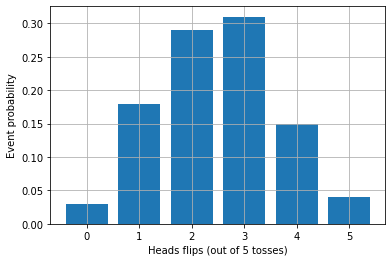

In [10]:
plt.bar(unique_values, prob)
plt.grid(True)
plt.xlabel('Heads flips (out of 5 tosses)')
plt.ylabel('Event probability');

>Above graph shows the probability distribution of getting heads, when you toss five coins a hundred times. So the probability of throwing two or three heads in five tosses is much higher than the probability of tossing zero or five heads.

## 5. Probability Distributions
A probability distribution is a statistical function that describes all the possible values and likelihoods that a random variable can take within a given range.
- Probability Distributions for Continuous Random Variables. 
- Probability Distributions for Discrete Random Variables.

### a. Probability Distributions for Discrete Random Variables:

- A discrete probability distribution, model the probabilities of random variables that can have discrete values as outcome, which are counted, not measured.
- For example, when a coin is tossed twice, the number of heads can be {0, 1, 2}, and not any value from 0 to 2 like 0.1 or 1.6. 
- Discrete probability distributions are usually described/expressed by a formula called Probability Mass Function, abbreviated as **pmf**. Or a frequency distribution table, which tells you the number of times the observation occurs in the data. For example, in {1, 2, 3, 4, 6, 9, 9, 8, 5, 1, 1, 9, 9, 0, 6, 9}, the frequency of the number 9 is 5 (because it occurs 5 times)
- The graph of a discrete probability distribution are bars, with their heights representing the probability of that specific value. 

<img align="right" width="300" height="150"  src="images/pmf.png"  > 

**Discrete Probability Distribution Graph:**
- This graph shows the probability distribution of getting heads, when you toss five coins a hundred times. So the probability of throwing two or three heads in five tosses is much higher than the probability of tossing zero or five heads.

**Discrete Probability Distribution Types:**

    - Binomial distribution
    - Bernoulli distribution
    - Multinomial distribution
    - Poisson distribution

### b. Probability Distributions for Continuous Random Variables:

- A continuous probability distribution, model the probabilities of random variables that can have continuous values as outcome, which are measured, not counted.
- For example, the possible values for the random variable X that represents weights of citizens in a town can have any value like 34.5, 47.7, etc. 
- Continuous probability distributions are usually described/expressed by a formula called Probability Density Function, abbreviated as **pdf**.
- The graph of a continuous probability distribution is a curve. 
- Probability is represented by area under the curve.
- Area under the curve is given by a different function called the Cumulative Distribution Function, abbreviated as **cdf**.

<img align="right" width="300" height="150"  src="images/pdf.png"  > 

**Continuous Probability Distribution Graph:**
- This graph shows the probability distribution for a continuous variable `amount of tip` given by customers in a restaurant, which ranges from 0 to 10.0. 

**Continuous Probability Distribution Types:**

    - Normal distribution
    - Standard Normal distribution
    - Log Normal distribution
    - Exponential distribution
    - Student’s T distribution
    - Chi-square distribution









Note: 
- The entire area under the curve and above the x-axis is equal to one.
- Probability is found for intervals of x values rather than for individual x values.
- P(c < x < d) is the probability that the random variable X is in the interval between the values c and d. 
- P(x = c) = 0 The probability that x takes on any single individual value is zero. 
- P(c < x < d) is the same as P(c ≤ x ≤ d) because probability is equal to area.


<img align="right" width="500" height="400"  src="images/normaldistr1.png"  >

### c. Guassian/Normal Distribution
- The `Gaussian` or `Normal` Distribution is given by Friedrich Gauss, also known as the `Bell Curve`.
- Guassian or Normal distribution is denoted as $\mathcal{N}(\mu, \sigma^2)$. 
- A normal distribution is known as the bell curve because it looks like a bell.
- The density curve is symmetrical
- Normal distribution is defined by its mean and standard deviation. 
- Normal distribution is centered about its mean, with standard deviation indicating its spread. 
- At point x, the height can be calculated with the following formula:

<img align="center" width="200" height="200"  src="images/normal.png"  >

Where,

    - μ = Mean Value
    - σ = Standard Distribution of probability.
    - If mean(μ) = 0 and standard deviation(σ) = 1, then this distribution is known to be normal distribution.
    - x = Normal random variable

- For normally distributed data:
    - 68.3% of observations are within 1 standard deviation from the mean (-1,1).
    - 95% of observations are within 2 standard deviations of the mean (-2,2).
    - 99.7% of observations are within 3 standard deviations of the mean, interval (-3,3). 


- Real World Examples:
    - Height of the Population of the world
    - Height of adult women
    - Height of adult men
    - Income distribution in countries economy among poor and rich
    - The sizes of females shoes
    - Weight of newly born babies range
    - Average report of Students based on their performance       

**Example:**

Mean:  24.9960646480403
Standard Deviation:  3.012827403667024


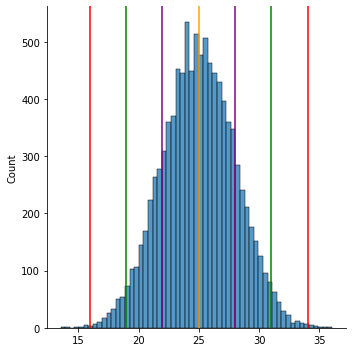

In [11]:
import numpy as np
x = np.random.normal(loc=25, scale=3, size=10000)
print("Mean: ",np.mean(x))
print("Standard Deviation: ",np.std(x))
sns.displot(x)
plt.axvline(np.mean(x), color='orange')
plt.axvline(np.mean(x) - np.std(x), color='purple')
plt.axvline(np.mean(x) + np.std(x), color='purple')
plt.axvline(np.mean(x) - 2*np.std(x), color='green')
plt.axvline(np.mean(x) + 2*np.std(x), color='green')
plt.axvline(np.mean(x) - 3*np.std(x), color='red')
plt.axvline(np.mean(x) + 3*np.std(x), color='red')
plt.show()

<img align="right" width="500" height="400"  src="images/stdnormal.jpeg"  >

### d. Standard Normal Distribution or Z-Distribution
- The **Standard Normal Distribution**, also called the **Z-Distribution**, is a special Normal Distribution where the mean ($\mu$) is 0 and the standard deviation ($\sigma$) is 1. 
- Normal distributions can be denoted as $\mathcal{N}(\mu, \sigma^2)$, thus the standard normal distribution can be denoted as $\mathcal{N}(0, 1)$. 
- Any normal distribution can be standardized by converting its values into z-scores. Z-scores tell you how many standard deviations from the mean each value lies.
- To covert a normally distributed data into a standard normal distribution, we need to subtract every data value from the mean and then divide the resulting value by the standard deviation.

$$ Z = \frac{x-\mu}{\sigma} $$

<img align="center" width="900" height="500"  src="images/standardizeddata.png"  >

**Example 1:** Suppose there are 10000 students in my Data Science class. Generate the random result of the students with mean of 60 and standard deviation of 10. You have secured 85% marks. Calculate your Z-score and see how many students are above you? Also draw the graph of the normal distribution

In [ ]:
# Let us first generate the random marks of ten thousand students, with a mean of 60 and standard deviation of 10
mu = 60
sigma = 10
np.random.seed(54)
x = np.random.normal(mu, sigma, 10000)
x

In [ ]:
# Let us verify, whether the mean and std dev of above distribution `x` is 60 and 10 respectively
print("np.mean(x): ", np.mean(x))
print("np.std(x): ", np.std(x))

In [ ]:
# You have secured 85 marks, let us now compute your z-score
xi = 85
z = (xi - np.mean(x))/np.std(x)
z = (xi - mu)/sigma
print("Your z-score: ", z)

> Your Z-Score is 2.5 standard deviation above the mean.

In [ ]:
# Let us calculate the number of students above you out of ten thousand and visualize this by drawing a graph.
a = len(np.where(x > 85)[0])
a

>Out of 10000 students, only 59 are above you :)

In [ ]:
sns.displot(x, color='green')
#ax.set_xlim(0, 100)
plt.axvline(mu, color='orange')
for i in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+i*sigma, color='red')
plt.axvline(xi, color='purple')
plt.show()

**Example 2:** This is continuation of above example. Suppose your marks in Data Science are still 85%, but this time the mean of the overall result has increased to 90% with a standard deviation of 2. Calculate your Z-score and see how many students are above you? Also draw the graph of the normal distribution

In [ ]:
# Let us first generate the random marks of ten thousand students, with a mean of 60 and standard deviation of 10
mu = 90
sigma = 2
np.random.seed(54)
x = np.random.normal(mu, sigma, 10000)
x

In [ ]:
#Let us verify, whether the mean and std dev of above distribution x is 90 and 2 respectively
print("np.mean(x): ", np.mean(x))
print("np.std(x): ", np.std(x))

In [ ]:
# You have secured 85 marks, let us now compute your z-score
xi = 85
z = (xi - np.mean(x))/np.std(x)
z = (xi - mu)/sigma
print("Your z-score: ", z)

>Your Z-Score is 2.5 standard deviation below the mean.

In [ ]:
#Let us calculate the number of students above you out of ten thousand and visualize this by drawing a graph.
a = len(np.where(x > 85)[0])
a

>Out of 10000 students, 9934 are above you :(

In [ ]:
sns.displot(x, color='gray')
#ax.set_xlim(0, 100)
plt.axvline(mu, color='orange')
for i in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+i*sigma, color='red')
plt.axvline(xi, color='purple')
plt.show()

### The `z-score` vs the `p-value`?
<img align="left" width="450" height="500"  src="images/pvalue1.png"  >
<img align="right" width="450" height="350" src="images/pvalue2.png"  >

- The `p-value` actually quantify the **probability** that a given observation would occur by chance alone. 
- For example, in our above two examples, in which we simulated exam results of 10K students, only `59` students attained a `z-score` above 2.5 and only `66` attained a `z-score` below -2.5. 
- Thus, if we randomly select one out of the 10k exam results, we would expect it to be outside of 2.5 (i.e., +/- 2.5) standard deviations only 1.25% of the time: 
$$ p-value = \frac{59+66}{10000} = 0.0125 = 1.25\% $$

**Compute p-value corresponding to Z-Score:**  https://www.statology.org/calculators/

## 6. Central Limit Theorem

- The `Central Limit Theorem states`:

#### <center> If you have a population with mean μ and standard deviation σ and you take sufficiently large random samples from that population with replacement, then the distribution of the sample means will be approximately normally distributed.</center>
- This will hold true regardless of whether the source population is normal or skewed, provided the sample size is sufficiently large.


<img align="center" width="650" height="150"  src="images/clt1.png"  >

**Law of Large Numbers vs Central Limit Theorem:**
- The central limit theorem is often confused with the law of large numbers by beginners. 
    - The law of large numbers states: "As a sample size grows, the sample mean gets closer to the population mean". 
    - Central limit theorem (CLT) states two things:
        - As the sample size grows, the shape of the distribution of the sample means resembles a bell shape. 
        - As the sample size grows, the center of the distribution of the sample means becomes very close to the population mean (which is essentially the law of large numbers).

### Central Limit Theorem in Practice

#### Example 1:
> **Drawing samples from a normal distribution**

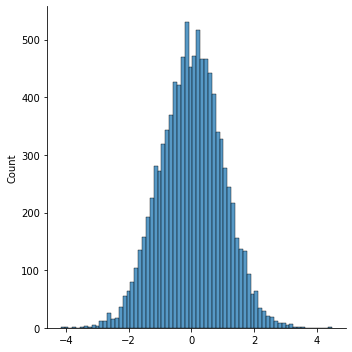

In [12]:
# Draw random sample of size from a normal distribution.
x1 = np.random.normal(size=10000)
sns.displot(x1);

**Trial 1:** # Generate a random sample from above normal distribution `x1`, of size **10** (without replacement). Draw corresponding histogram.

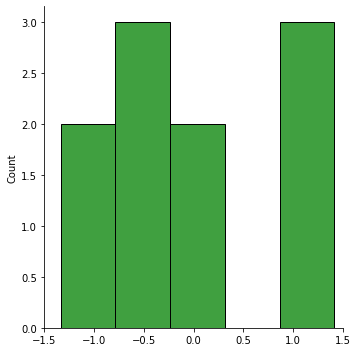

In [13]:
sample = np.random.choice(a=x1, size=10, replace=False)
sns.displot(sample, color='green')
plt.xlim(-1.5, 1.5)
plt.show()

With a smaller number of samples (10 in this case), the histogram is scattered all over and does not have a definite pattern. However, by increasing the sample size, the sampling distribution starts to resemble a normal distribution. This is the "Central Limit Theorem".

In [14]:
# Function is passed the population distribution from which to draw samples
# n is the number of samples to be drawn, while size is the size of each sample
# Function returns a list of means of all the samples
def myfunc(distr, n, size):
    sample_means = []
    for i in range(n):
        sample = np.random.choice(distr, size=size, replace=False) #Generates a random sample from a given 1-D array
        sample_means.append(sample.mean())
    return sample_means

**Trial 2:** # Generate **10** random samples from above normal distribution `x1`, of size **10** each (without replacement). Draw histogram of the mean of those ten samples.

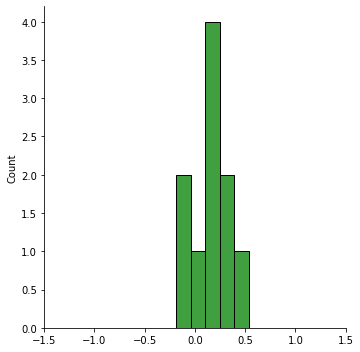

In [15]:
#Pass the displot method the list of means returned by myfunc()
sns.displot(myfunc(distr=x1, n=10, size=10), color='green')
plt.xlim(-1.5, 1.5)
plt.show()

**Trial 3:** # Generate **100** random samples from above normal distribution `x1`, of size **10** each (without replacement). Draw histogram of the mean of those hundred samples.

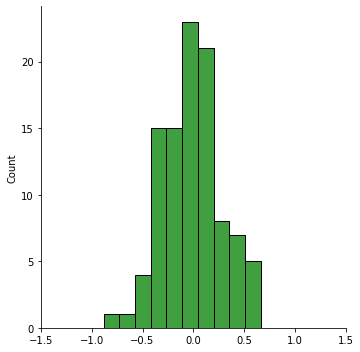

In [16]:
#Pass the displot method the list of means returned by myfunc()
sns.displot(myfunc(distr=x1, n=100, size=10), color='green')
plt.xlim(-1.5, 1.5)
plt.show()

**Trial 4:** # Generate **1000** random samples from above normal distribution `x1`, of size **10** each (without replacement). Draw histogram of the mean of those thousand samples.

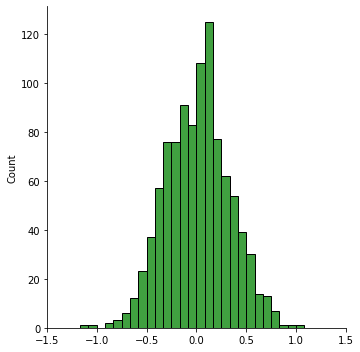

In [17]:
#Pass the displot method the list of means returned by myfunc()
sns.displot(myfunc(distr=x1, n=1000, size=10), color='green')
plt.xlim(-1.5, 1.5)
plt.show()

#### Example 2:
> **Drawing samples from a skewed distribution**

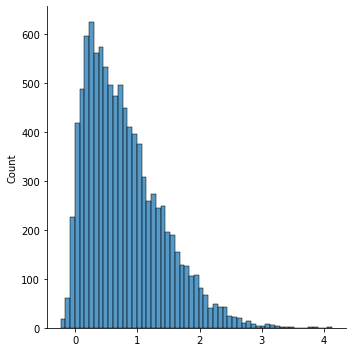

In [18]:
# Draw positive or negitive skewed distribution based on first parameter
x2 = st.skewnorm.rvs(10, size=10000)
sns.displot(x2);

**Trial 1:** Generate **10** random samples from above normal distribution `x2`, of size **10** each (without replacement). Draw histogram of the mean of those ten samples.

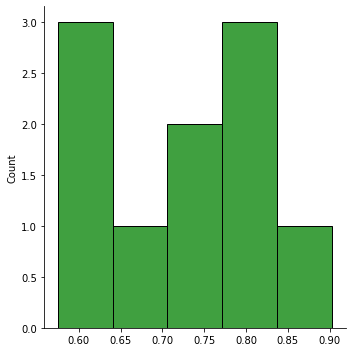

In [19]:
#Pass the displot method the list of means returned by myfunc()
sns.displot(myfunc(distr=x2, n=10, size=10), color='green')
plt.show()

**Trial 2:** # Generate **10,000** random samples from above normal distribution `x1`, of size **10** each (without replacement). Draw histogram of the mean of those thousand samples.

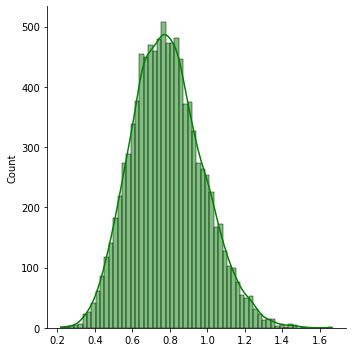

In [20]:
#Pass the displot method the list of means returned by myfunc()
sns.displot(myfunc(distr=x2, n=10000, size=10), color='green', kde=True)
plt.show()

#### Example 3:
> **Drawing samples from a multimodal distribution**

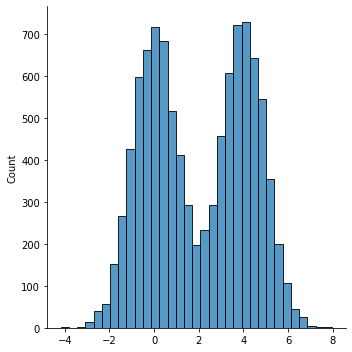

In [21]:
x3 = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))
sns.displot(x3);

**Trial 1:** Generate **10** random samples from above normal distribution `x3`, of size **10** each (without replacement). Draw histogram of the mean of those ten samples.

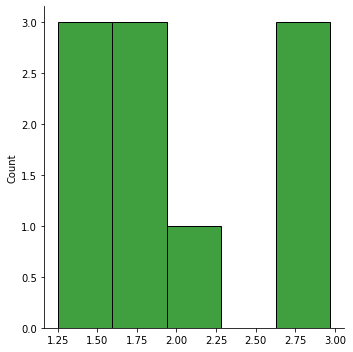

In [22]:
#Pass the displot method the list of means returned by myfunc()
sns.displot(myfunc(distr=x3, n=10, size=10), color='green')
plt.show()

**Trial 2:** Generate **10,000** random samples from above normal distribution `x3`, of size **10** each (without replacement). Draw histogram of the mean of those ten thousand samples.

In [ ]:
#Pass the displot method the list of means returned by myfunc()
sns.displot(myfunc(distr=x3, n=10000, size=10), color='green', kde=True)
plt.show()

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import math as m
import statistics
import scipy.stats as st
import statsmodels as sm

# <span style='background :lightgreen' > Section 2: (Hypothesis Testing) </span>

### 1. Overview of Hypothesis Testing

<img align="centre" width="800" height="400"  src="images/overview.png"  >


<br>
<br>

###### <center> “A hypothesis is an idea that can be tested.” </center>

###### <center> “Hypothesis Testing is the process of evaluating two mutually exclusive statements on population data using sample.” </center>

<img align="centre" width="400" height="300"  src="images/hypothesis1.png"  >

**1. Formulate the hypothesis**

**2. Gather random sample data from target population**

**3. Select appropriate Test**

**4. Execute/Perform the Test**

**5. Make a Decision**

**6. Check Errors**

### a. How to Formulate a Hypothesis?
<img align="center" width="300" height="300"  src="images/hypothesis.png"  > 

- The **Null Hypothesis ($H_0$)** is the status quo. (Innocent until proven guilty)
- The **Alternative Hypothesis ($H_A$)** is also called the research hypothesis, which is the claim to be tested. A researcher actualy propose the Alternative hypothesis and then tries to reject the Null hypothesis.

<img align="right" width="350" height="350"  src="images/twotailed.png"  > 

**Example 1:** A teacher believes that a certain teaching technique will influence the mean score of his students in semester exams. But he is not sure whether it will increase or decrease the mean score, which is currently 65%. To test this he apply the new teaching technique on his class of students. After the semester result, he applies the appropriate type of hypothesis test, and see if he can reject the Null Hypothesis.

- Null Hypothesis ($H_0$): New teaching technique will have no effect on mean score 65


- Alternative Hypothesis  ($H_A$): New teaching technique will cause the mean score to be different than 65


- $H_0: \mu = 65$ $\hspace{0.5cm}$ and  $\hspace{0.5cm}$    $H_A: \mu \neq 65 $


- Since, the alternative hypothesis has a not equal to sign, so the test will be a two tailed test or a non-directional test; because the teacher can test for effects in both direction.

<img align="right" width="350" height="350"  src="images/righttailed.png"  > 

**Example 2:** A biologist believes that a certain fertilizer will cause the plants to grow more in one month than they normally do (status-quo). The average growth rate is currently less than or equal to 5 centimeters.

- Null Hypothesis ($H_0$): Fertilizer has no effect on the mean plant growth


- Alternative Hypothesis  ($H_A$): Fertilizer will cause mean plant growth to increase


- $H_0: \mu$ ≤ 5 cm $\hspace{0.5cm}$ and  $\hspace{0.5cm}$    $H_A: \mu > 5$ cm


- Since, the alternative hypothesis has a greater than sign, so the test will be a single tailed test or a directional test or a right tailed test.

<img align="right" width="350" height="350"  src="images/lefttailed.png"  > 

**Example 3:** A doctor believes that a new drug will be able to reduce the blood pressure in patients. The average blood pressure is currently greater than or equal to 150. To test this he/she gave that drug to a group of patients and test the effect by checking the blood pressure for one month and then perform the test.

- Null Hypothesis ($H_0$): The mean blood pressure will remain same after using the drug


- Alternative Hypothesis  ($H_A$): The mean blood pressure will reduce after using drug


- $H_0: \mu ≥ 150$ $\hspace{0.5cm}$ and  $\hspace{0.5cm}$    $H_A: \mu < 150 $


- Since, the alternative hypothesis has a less than sign, so the test will be a single tailed test or a directional test or a left tailed test.

#### For a two-tailed test, we define `H0: µ1 = µ2 and Ha: µ1 ≠ µ2`

#### For a one-tailed test, we can define `H0: µ1 ≤ µ2 and Ha: µ1 > µ2` or

#### For a one-tailed test, we can define `H0: µ1 ≥ µ2 and Ha: µ1 < µ2`


**Example:** 
- Let us suppose that I give you a coin, and ask you to check if it is a fair coin, how you should proceed?
    - First of all you should assume that the coin is fair (null hypothesis). 
    - Then you test the coin by flipping it six times.
    - Let us susppose that it comes up heads on all six times or it comes up tails on all six times.
    - The probability of throwing six heads is 0.015625 and similarly the probability of throwing six tails is 0.015625
    - Therefore, the probability of throwing six heads or six tails in a six coin flip experiment, is 0.03125
    - This observation would suggest that you should *reject the null hypothesis* because chance alone would facilitate such an observation less than 5% of the time, i.e., $p < .05$.
    - So finally you will tell your friend that this is not a fair coin, and being a statistician you will say "**This is a statistically meaningfull observation**"

### b. Types of Hypothesis Tests

<img align="centre" width="850" height="700"  src="images/type.png"  >

**Note:**
- If the sample data sets are drawn from a population, which is normally distributed we used parametric tests.


- The Non-Parametric tests are also known as distribution free tests, and you can apply them on sample data sets, that are drawn from normally distributed, as well as from non-normally distributed populations.


- One Sample tests allows us to compare the mean of a sample against a reference mean. While two sample tests allows us to comare the mean of two separate samples, which can be independent or paired.


- Z-Test is used to compare means when the population standard deviation is known and the sample size is large (> 30).


- T-Test is used to compare means when the population standard deviation is NOT known and the sample size is small (< 30).

### c. Some Terminologies related to Hypothesis Testing
#### Two-sided problems

<img align="right" width="600" height="800"  src="images/test1.png"  >

A size $\alpha$ test for $H_0: \mu = \mu_0$ versus $H_A: \mu \neq \mu_0$

Reject $H_0$ if the test statistics is in the **rejection region**
$$R = [t: \mid t \mid > t_{\alpha/2, n-1}]$$
and accepts if in the **acceptance region**
$$A = [t: \mid t \mid \leq t_{\alpha/2, n-1}]$$


#### One-sided problems
A size $\alpha$ test for $H_0: \mu \geq \mu_0$ versus $H_A: \mu < \mu_0$

Reject $H_0$ if the test statistics is in the **rejection region**
$$R = [t:  t < - t_{\alpha, n-1}]$$
and accepts if in the **acceptance region**
$$A = [t: t \geq - t_{\alpha, n-1}]$$

<img align="right" width="380" height="300"  src="images/cf.png"  >

### Types of errors
The errors in hypothesis testing are nothing but our biases towards either null hypothesis or alternative hypothesis.

- Type I error: An error committed by rejecting the null hypothesis when it is true.
- Type II error: An error committed by accepting the null hypothesis when it is false.

## 2. Student's Single Sample T-Test

- The **Z-scores** applies to individual values only. The formula for calculating a **z-score**: 
$$ z = \frac{x_i-\mu}{\sigma} $$
- The Student's Single Sample T-Test help us compare a sample of multiple values to some reference mean and is used on `continuous variables`. 
- William Gosset published this paper of T-test under the pseudoname "Student"
- Following are Assumptions of this test:
    - Population distribution is normal.
    - Samples are random and independent
    - The sample size is small or less than 30.
- The outcome of the t-test produces the t-value or t-score.

- The **single-sample *t*-test** is a variation of above formula and is defined by: 
$$ t = \frac{\bar{x} - \mu_0}{s_{\bar{x}}} $$
Where: 
    * $\bar{x}$ is the sample mean
    * $\mu_0$ is a reference mean, e.g., known population mean or "null hypothesis" mean
    * $s_{\bar{x}}$ is the sample standard error = $\frac{\sigma}{\sqrt n}$
    * Use degree of freedom as n-1

### Example: Single Sample T-Test

Suppose we want to know that a certain species of Penguins in Pakistan is equal to 310 pounds. Test this hypothesis using a single sample T-Test at significance level of 95%

**Step 1: Formulate the Hypothesis**
- $H_0: \mu = 310 $ $\hspace{0.5cm}$ and  $\hspace{0.5cm}$    $H_A: \mu \neq 310 $

**Step 2: Data gathering**

Since we cannot check the weight of all the penguins in Pakistan, so we took a random sample of 40 penguins and weigh them. The data is as under:

In [ ]:
n = 40         # sample size
mu = 310.      # mean of population (reference mean)
xbar = 300     # mean of the sample
s = 18.5       # standard deviation of sample

**Step 3: Compute T-Score**

In [ ]:
#calculate standard error
sx = s/(n**.5)

In [ ]:
#calculate t-score
t_value = (xbar - mu)/sx
t_value

**Step 4: Compute p-value corresponding to T-Score:** https://www.statology.org/t-score-p-value-calculator/

- Keep the degree of freedom = n-1 = 39
- Resulting p-value = 0.00149

<img align="right" width="400" height="500"  src="images/test1.png"  >

**Step 5: Compare p-value with α (alpha)**
- It is given that we have to check this at a 95% confidence level, which means α = 5% or 0.05. Moreover, since it is a two-tailed, therefore, α = 0.025: 

In [ ]:
p_value = 0.00149
alpha = 0.025
if(p_value < alpha):
    print("The result is significant, so we Reject Null Hypothesis")
else:
    print("Fail to Reject NUll Hypothesis")

## 3. Student's Two Independent Samples T-Test
- The Student's Two Sample T-Test is used to determine whether or not two population means are equal. The formula for computing t-score for Student's. Two Sample T-Test is given below:

<img align="left" width="200" height="100"  src="images/twosamplettest.jpeg"  >    

### Example: Two Independent Samples T-Test

Suppose we want to know whether or not the mean weight of two species of penguins (Adelie and Gentoo) in Pakistan is equal. Test this hypothesis using a two sample T-Test at significance level of 95%

**Step 1: Formulate the Hypothesis**
- $H_0: \mu_1 = \mu_2 $   $\hspace{0.5cm}$ and  $\hspace{0.5cm}$    $H_A: \mu_1 \neq \mu_2$

**Step 2: Data gathering**
- Since there are thousands of penguins of these two species in Pakistan, it would be too time consuming and costly to go around and weigh each individual penguin. 
- So we take two random samples of 15 penguins from each population of species (Adelie and Gentoo) and use the mean weight in each sample to determine if the mean weight is equal between the two populations. 
- This is for sure that the mean weight between the two samples will be a little different. The question is whether or not this difference is statically significant. Test this hypothesis using a two sample T-Test at significance level of 95%
- The data is as under: 

**Note:** The two samples should have approximately same variance, If this assumption is not met, you should use Welch's Test instead

In [ ]:
alpha = 0.025 # 95%, Because it is a two tailed test, therefore, the rejection region will be on both extremes .05/2

# Data about sample of Adelie species
x1bar = 300       # sample mean
n1 = 40           # sample size
s1 = 18.5         # standard deviation of sample

# Data about sample of Gantoo species
x2bar = 305       # sample mean
n2 = 38           # sample size
s2 = 16.7         # standard deviation of sample

**Step 3: Compute T-Score**
- You do this by taking the difference in the two sample means and dividing by either the pooled or unpooled estimated standard error. The estimated standard error is an aggregate measure of the amount of variation in both groups.

In [ ]:
# pooled estimated standard error
sp = ((((n1-1)*(s1**2)) + ((n2-1)*(s2**2)))/(n1+n2-2))**0.5
sp

In [ ]:
t_value = (x1bar-x2bar)/(sp * (((1/n1) + (1/n2))**0.5))
t_value

**Step 4: Compute p-value corresponding to T-Score:** https://www.statology.org/t-score-p-value-calculator/
- Keep the degree of freedom = n1 + n2 - 2 = 76
- Resulting p-value = 0.21485

**Step 5: Compare p-value with α (alpha)**
- It is given that we have to check this at a 95% confidence level, which means α = 5% or 0.05. Moreover, since it is a two-tailed, therefore, α = 0.025: 

In [ ]:
p_value = 0.21485
alpha = 0.025
if(p_value < alpha):
    print("The result is significant, so we Reject Null Hypothesis")
else:
    print("The result is not significant, so we Fail to Reject NUll Hypothesis")

>Therefore, we donot have sufficient evidence to say that the mean weight of two species of penguins is different

## 4. Student's Paired Sample T-Test

We can use Student's **paired-sample** (a.k.a., **dependent**) *t*-test: 
$$ t = \frac{\bar{d} - \mu_0}{s_\bar{d}} $$ 
Where: 
* $d$ is a vector of the differences between paired samples $x$ and $y$
* $\bar{d}$ is the mean of the differences
* $\mu_0$ will typically be zero, meaning the null hypothesis is that there is no difference between $x$ and $y$
* $s_\bar{d}$ is the standard error of the differences

Here's an example: 

### Example: Paired Sample T-Test

- Suppose you have a dataset `exercise` containing heart rate (pulse), of 30 persons.
- Their pulse is taken at three different time points in an experiment. (i.e, after one, 15, and 30 minutes of resting, walking and running). 
- Ten people were assigned to each of three activity groups
- Check whether the mean heart rate varies significantly after one minute of walking relative to after 15 minutes

**Step 2: Data gathering**
- Let us suppose this time we have a dataset containg the related observations

In [ ]:
df = sns.load_dataset('exercise')
df

In [ ]:
np.unique(df.diet, return_counts=True)

In [ ]:
np.unique(df.time, return_counts=True)

In [ ]:
np.unique(df.kind, return_counts=True)

In [ ]:
rest = df[df.kind == 'rest']
rest

In [ ]:
run = df[df.kind == 'running']
run

In [ ]:
sns.boxplot(x='time', y='pulse', data=rest);

In [ ]:
sns.boxplot(x='time', y='pulse', data=run);

- Check whether the mean heart rate varies significantly after one minute of walking relative to after 15 minutes, 

**Step 1: Formulate the Hypothesis**
- $H_0: \hspace{0.5cm}$ Mean heart rate varies significantly after one minute of walking relative to after 15 minutes
- $H_A: \hspace{0.5cm}$ Mean heart rate DOES NOT varies significantly after one minute of walking relative to after 15 minutes

**Step 2: Data gathering**

In [ ]:
# For simplicity, let's only consider one of the six experimental groups, say the walking, no-fat dieters: 
walk_no = df[(df.diet == 'no fat') & (df.kind == 'walking')]
walk_no

(Note how participant 16 has a relatively low heart rate at all three timepoints, whereas participant 20 has a relatively high heart rate at all three timepoints.)

In [ ]:
sns.boxplot(x='time', y='pulse', data=walk_no);

In [ ]:
walk_no[walk_no.time == '1 min']

In [ ]:
walk_no[walk_no.time == '1 min']['pulse']

In [ ]:
min1 = walk_no[walk_no.time == '1 min']['pulse'].to_numpy()
min1

In [ ]:
min15 = walk_no[walk_no.time == '15 min']['pulse'].to_numpy()
min15

(With paired samples, we can plot the values in a scatterplot, which wouldn't make any sense for independent samples, e.g.:)

In [ ]:
sns.scatterplot(x=min1, y=min15)
plt.title('Heart rate of no-fat dieters (beats per minute)')
plt.xlabel('After 1 minute walking')
plt.ylabel('After 15 minutes walking');

**Step 3+4: Compute T-Score and p-value using `ttest_rel()` method of scipy.stats**

In [ ]:
st.ttest_rel(min1, min15)

**Step 5: Compare p-value with α = 0.05 (alpha)**

In [ ]:
p_value = 0.02846
alpha = 0.025
if(p_value < alpha):
    print("The result is significant, so we Reject Null Hypothesis")
else:
    print("The result is not significant, so we Fail to Reject NUll Hypothesis")

#### Applications of T-Tests in Machine Learning

* Single-sample: Does my stochastic model tend to be more accurate than an established benchmark? 
* Independent samples: Does my model have unwanted bias in it, e.g., do white men score higher than other demographic groups with HR model? 
* Paired samples: Is new TensorFlow.js model significantly faster? (paired by browser / device)

# <span style='background :lightgreen' > Section 3: (A Journey from Variance, Covariance, Correlation to Regression) </span>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import math as m
import statistics
import scipy.stats as st
import statsmodels as sm

## 1. A Quick Recap

### a. Variance and Standard Deviation

- `Variance` or `standard deviation` tells us how much a (single) quantity varies w.r.t. its mean 'OR' how spread out the data is around the center of the distribution (the mean).  
- The value of variance doesn't give us any information, so we take its square root to calculate the `Standard Deviation` 
- It also gives you an idea of where, percentage wise, a certain value falls. For example, let’s say you took a test and it was normally distributed (shaped like a bell). You score one standard deviation above the mean. That tells you your score puts you in the top 84% of test takers.
- Low standard deviation implies that most values are close to the mean. High standard deviation suggests that the values are more broadly spread out.

<img align="left" width="400" height="300"  src="images/std_dev.jpeg"  >
<img align="right" width="400" height="750"  src="images/bellcurve.png"  >

$\frac{\sum(x_i-\bar{x})^2}{n}$

**Example 1:**

In [ ]:
data1 = [2, 4, 6]

In [ ]:
print("Population Variance: ", np.var(data1, ddof=0))  # use n degrees of freedom
print("Sample Variance: ", np.var(data1, ddof=1))      # use n-1 degrees of freedom

In [1]:
print("Population Std Dev: ", np.std(data1, ddof=0))   #((4+0+4)/3)**.5  # use n degrees of freedom
print("Sample Std Dev: ", np.std(data1, ddof=1))       #((4+0+4)/2)**.5  # use n-1 degrees of freedom

NameError: name 'np' is not defined

**Example 2:**

In [ ]:
data2 = [75, 69, 80, 70, 60, 63, 64, 69, 71]
print("Mean: ", np.mean(data2))
print("Std Dev: ", np.std(data2))

>**Low standard deviation implies that most values are close to the mean.**

**Example 3**

In [ ]:
data3 = [44, 95, 25, 60, 76, 81, 93, 84, 71, 33, 85, 81]
print("Mean: ", np.mean(data3))
print("Std Dev: ", np.std(data3))

>**Note: High standard deviation implies that the values are more broadly spread out.**

### b. Covariance
- If we have two vectors of the same length, $x$ and $y$, where each element of $x$ is paired with the corresponding element of $y$, **covariance** provides a measure of how related the variables are to each other:
$$ \text{cov}(x, y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n} $$

- Covariance is used to measure as to how the mean values of two random variables move together. For example the height and weight of a person in a population. 


<img align="center" width="500" height="500"  src="images/pnw_cov.png"  >
 
- The covariance value of two variables x and y can lie anywhere between negative infinity and positive infinity.
- Covariance measures the direction of the relationship between two variables. 
    - `Positive covariance`: Indicates that two variables tend to move in the same direction.
    - `Negative covariance`: Reveals that two variables tend to move in inverse directions.
    - `Zero covarince`: Indicates that two variables have no relationship between each other.
- **Covariance Matrix:** For multi-dimensional data, there applies a generalization of covariance in terms of a covariance matrix. The covariance matrix is also known as the variance-covariance matrix, as the diagonal values of the covariance matrix show variances and the other values are the covariances. The covariance matrix for two variables is a square matrix which can be written as follows:

<img align="center" width="300" height="300"  src="images/covmatrix.png"  >

**Example 1: Positive Covariance**

In [2]:
weight = [61,62,73,74,82,86]
height = [157,168,170,181,191,185]
np.cov(height, weight,ddof=1)     # sample variance along diagonal, and other values are covariances

NameError: name 'np' is not defined

In [ ]:
print("Variance of height: ", np.var(height, ddof=1))      # sample variance
print("Variance of weight: ", np.var(weight, ddof=1))     # sample variance

print("Covariance of weight, height: ", statistics.covariance(weight, height))
print("Covariance of height, weight: ", statistics.covariance(height, weight))

>- **Since the covariance is positive, so that means the two variables have a positive relationship**

**Example 2: Negative Covariance**

In [ ]:
drug = np.array([0, 1, 2, 3, 4, 5, 6, 7.])                         # Drug dosage in ml
forgetness = np.array([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])   # Level of forgetfullness
np.cov(drug, forgetness)

In [ ]:
print("Variance of Drug: ", np.var(drug, ddof=1))                        # sample variance
print("Variance of Forgetfullness: ", np.var(forgetness, ddof=1))     # sample variance

print("Covariance of drug, forgetfulness: ", statistics.covariance(drug, forgetness))
print("Covariance of forgetfullness, drug: ", statistics.covariance(drug, forgetness))

>- **Since the covariance is negative, so that means the two variables have a negative relationship**

### c. Correlation and Pearson's Correlation Coefficient
- The value of Covariance range from negative infinity to positive infinity, so it tells us the direction and not the magnitude of relationship between two random variables. On the other hand the value of correlation coefficient range from -1 to +1, so it tells us the direction as well as the magnitude of relationship between the two variables.

- Another difference between the two is that Covariance is affected by the change in scale. If all the values of one variable are multiplied by a constant and all the values of another variable are multiplied, by a similar or different constant, then the covariance is changed. On the other hand correlation is not affected by the change in scale.

- For electricity generation using a windmill, if the speed of the wind turbine increases, the generation output will increase accordingly. Thus, the variable speed and electricity output have a positive correlation here.

- The correlation coefficient is used to measure the strength of the relationship between two quantitative variables.

- There are several types of correlation coefficients. The correlation coefficient (developed by Karl Pearson) denoted with $r$ or $\rho$ is the most common and is defined by: 
$$ \rho_{x,y} = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} $$

- The following correlation graphs show the examples of different range of values for a correlation coefficient

<img align="centre" width="750" height="700"  src="images/poszeronegcor.png"  >


- **Correlation Matrix:** is a table showing correlation coefficients between various variables. The rows and columns contain the value of the variables, and each cell shows the correlation coefficient.
<img align="center" width="400" height="400"  src="images/correlation_matrix.png"  >

**Example 1: Strong Positive Correlation**

In [ ]:
study = np.array([1, 2, 3, 4, 5, 6, 7.])               # study hours 
gpa = np.array([1.0, 1.3, 2.5, 2.6, 3.5, 3.7, 4.0])   # gpa

print("Correlation Matrix: \n", np.corrcoef(study, gpa))

sns.scatterplot(x=study, y=gpa)
plt.title("Study Hours vs GPA of Students")
plt.xlabel("Study Hours")
plt.ylabel("GPA")
plt.show()

**Example 2: Strong Negative Correlation**

In [ ]:
drug = np.array([0, 1, 2, 3, 4, 5, 6, 7.])                         # Drug dosage in ml
forgetness = np.array([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])   # Level of forgetfullness

print("Correlation Matrix: \n", np.corrcoef(drug, forgetness))


sns.scatterplot(x=drug, y=forgetness)
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Forgetfulness")
plt.show()

### d. Regression

<img align="right" width="400" height="400"  src="images/corvsreg.jpeg"  >

**Correlation** lets us know the magnitude and direction of relationship between two random variables ‘x’ and ‘y’, while **Regression**, on the other hand, predicts the value of the dependent variable based on the known value of the independent variable, assuming that the average mathematical relationship between two or more variables.

1. Regression can differentiate between `dependent` and `independent` variables, while correlation cannot. 
    - The variables study hours and drug dosage, that we plotted along horizontal axis are the independent variables or feature variables, or predictor variables.
    - The variables GPA and forgetfullness, that we plotted along vertical axis are the dependent variables or the outcome variables.
    

2. Regression can measure `causality` as well, while correlation just tell the direction of movement between two variables. 
    - Causality tells us how one variable can impact or influance another variable. 
    - For example, the more drug you provide the less is the forgetfullness. We give the drug first and then check the forgetfulness. So there is a causal relationship from drug dosage to forgetfullness.



3. Regression can measure the strength and direction of both linear as well as non-linear relationship between two variables, while correlation can do this for linear relationship only.


4. The reg(x,y) and reg(y,x) are completely different, while the corr(x,y) and corr(y,x) are identical. 


5. The graphical representation of a correlation is a single point, while a line visualizes a linear regression (Correlation produces a single statistics, while regression produces a statistical model).

**Example 1:**

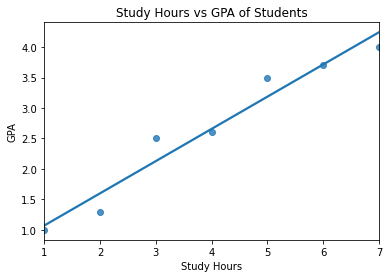

In [2]:
study = np.array([1, 2, 3, 4, 5, 6, 7.])               # study hours 
gpa = np.array([1.0, 1.3, 2.5, 2.6, 3.5, 3.7, 4.0])   # gpa
# plotting the regression line using regplot
sns.regplot(x=study, y=gpa, ci=None, order=1)
plt.title("Study Hours vs GPA of Students")
plt.xlabel("Study Hours")
plt.ylabel("GPA")
plt.show()

**Example 2:**

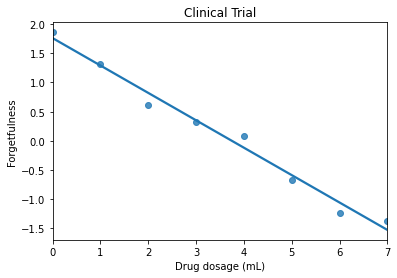

In [4]:
drug = np.array([0, 1, 2, 3, 4, 5, 6, 7.])                         # Drug dosage in ml
forgetness = np.array([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])   # Level of forgetfullness
# plotting the regression line using regplot
sns.regplot(x=drug, y=forgetness, ci=None, order=1);
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Forgetfulness")
plt.show();

## 2. Regression Analysis

<img align="right" width="550" height="400"  src="images/ml.png"  >
<img align="left" width="425" height="250"  src="images/type.jpg"  >


## 3. What is Linear Regression

<img align="center" width="400" height="300"  src="images/studyhours.png"  >

<img align="center" width="400" height="300"  src="images/equation.png"  >

### <center> `A simple linear regression model is a mathematical equation that allows us to predict a response for a given predictor value.` </center>

- The relationship between two variables can be represented by a simple equation called the regression equation. 
- The regression equation actually tells you, how much dependent/outcome variable `y` changes with any given change of independent/feature/predictor variable `x`.
- The regression equation can be used to construct a regression line on a scatter diagram, and in the simplest case this is assumed to be a straight line. 
- The direction in which the line slopes depends on whether the correlation is positive or negative. 

### a. How do we Fit a Line?
(i) Let us try to understand the idea behind fitting the line. The linear regression algorithm first throws a random line, which slowly gets closer and closer to the points until it gets to the point that works.

<img align="centre" width="400" height="300"  src="images/line.png"  >



(ii) Let say, algorithm throws a random line and then starts asking to the points, "What they want", one by one. It picks a random point which says come closer. So it listens to it, and move the line a bit closer to that point. 


<img align="centre" width="600" height="300"  src="images/line1.png"  >



(iii) And it repeats the process for every point, and many a times until we get the line which is best-fit for the data points.

<img align="centre" width="600" height="300"  src="images/line2.png"  >



<img align="right" width="300" height="200"  src="images/line3.png"  >

### b. How do we Move a Line Close to a Point?
- Let say we have point and a line plotted on a graph and point says come closer. We have two parameters to define the movement of the line:
    - `Slope (m)`: $=$ `rise`/`run` = `vertical distance` / `horizontal distance`
    - `y-intercept (b)`: It tells how high the line touches the Y-axis (vertical distance)    
- Thus, to move this line closer to the point we need to adjust the slope and y-intercept, and we can do two operations on them (increase or decrease)

### c. Rotation and Translation

#### (i) `Rotation`
- Rotation means changing the `slope`. If we want to increase the slope rotate the line `counter clock-wise`. If we want to decrease the slope rotate the line in `clock-wise` direction. The point where the rotation happens is the point where the line interscets the y-axis and called `Pivot`.
<img align="centre" width="500" height="400"  src="images/line4.png"  >

#### (ii) `Translation`
- Translation means changing the `y-intercept`. To move the line in upward direction, `increase the y-intercept`, and to move the line in downward direction, `decrease the y-intercept`.
<img align="centre" width="500" height="400"  src="images/line5.png"  >

### d. Correct Combination of Rotation and Translation
- To move a line in four different regions, we need a correction combination of Rotation and Translation
- So we have four cases:

| Direction | Rotation | Translation |
|-----------|----------|-------------|
|Upward| Counter-clockwise (Increased Slope) | Translate line Up (Increased y-intercept) |
|Downward| Clockwise (Decreased Slope) | Translate line down (Decreased y-intercept) |


### e. How to Move the Line using Mathematical Model (Linear equation)

<img align="right" width="400" height="300"  src="images/p1.png"  >

- Let say, we have a point and a random line, and point says come closer. Let say tha slope of line is `m = 2`, and y-intercept is `c = 3`. Thus the linear equation of line will be:


### <center> `y = 2x + 3` </center>
    
    
- Now here is a very important rule of machine learning, that states: Never make drastic step, which means move the line by very tiny amount, beacuse we are going to move this many times, may be 1000 of times. So we are going to pick a very small number to multiply the equation with, which is called `Learning Rate`.



- In machine learning and statistics, the learning rate is a tuning parameter in an optimization algorithm.



- Let say we pick a very small number 0.01, now the second step is:
    - add/subtract learning rate to slope (depending on the slope (counter-clockwise / clockwise) )
    - add/subtract learning rate to y-intercept (depending on the translation (up/down) )

### f. Linear Regression Algorithm `(Version 1)`
- `Step 1`: Start with a Random line, and we perform several steps to fit this line better and better.


- `Step 2`: In machine learing, we repeat a process many times to make it better, so second step is to pick a large number for repetitions or epochs (An epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed). So let say we pick a number 10000.



- `Step 3`: Pick a small number or Learning Rate, let say 0.01.


- `Step 4`: Now repeat the process 10000 times (loop). Following process we are going to repeat:

    - Pick a Random point
    - Move line towards point using this method:
    
               - If point above line, and to the right of y-axis
                   - Rotate counter-clockwise and translate up which means
                       - add 0.01 to slope
                       - add 0.01 to y-intercept
                 
                 
                
               - If point above line, and to the left of y-axis
                   - Rotate clockwise and translate up which means
                       - subtract 0.01 to slope
                       - add 0.01 to y-intercept
                   
                   
               - If point below line, and to the right of y-axis
                   - Rotate clockwise and translate down which means
                       - subtract 0.01 to slope
                       - subtract 0.01 to y-intercept
                   
                      
               - If point below line, and to the left of y-axis
                   - Rotate counter-clockwise and translate down which means
                       - add 0.01 to slope
                       - subtract 0.01 to y-intercept

 - `Step 5`: Enjoy the Best-fitted line ☺

In [1]:
5-.08

4.92

### g. Improved Linear Regression Algorithm `(Version 2)`

<img align="right" width="400" height="400"  src="images/p2.png"  >

In the above algorithm, we have four conditions based on which we perform the appropriate addition or subtraction operations on the slope and y-intercept values of the line. This algorithm aovids those four if...else conditions.

- `Step 1`: Start with a Random line, and we perform several steps to fit this line better and better.


- `Step 2`: In machine learing, we repeat a process many times to make it better, so second step is to pick a large number for repetitions or epochs. (An epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed). So let say we pick a number 1000.



- `Step 3`: Pick a small number or Learning Rate, let say 0.01.


- `Step 4`: Now repeat the process 1000 times (loop). Following process we are going to repeat:
    - Pick a Random point
    - Move line towards point using this method:
        - Add (learning rate) x (vertical distance) x (horizontal distance) to slope
        - Add (learning rate) x (vertical distance) to y-intercept

- `Step 5`: Enjoy the Best-fitted line ☺

Note: This algorithm is the basic idea behind the trandional algorithms such as Gradient descent or square error algorithm that are mostly used for peforming linear regression in machine learning.

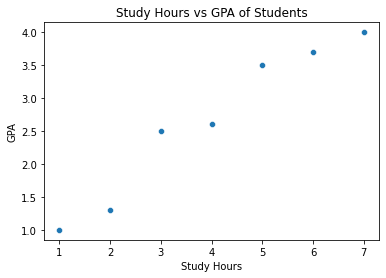

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
X = np.array([1, 2, 3, 4, 5, 6, 7.])               # study hours 
Y = np.array([1.0, 1.3, 2.5, 2.6, 3.5, 3.7, 4.0])   # gpa
# plotting the regression line using regplot
sns.scatterplot(x=X, y=Y)
plt.title("Study Hours vs GPA of Students")
plt.xlabel("Study Hours")
plt.ylabel("GPA")
plt.show()


In [16]:
# Initially let m = 0 and c = 0. Let L be our learning rate. 
#This controls how much the value of m changes with each step. L could be a small value like 0.0001 for good accuracy.
m = 0
c = 0
L = 0.00001  # The learning Rate
epochs = 100000  # The number of iterations to perform gradient descent
n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
# Calculate the partial derivative of the loss function with respect to m, 
# and plug in the current values of x, y, m and c in it to obtain the derivative value D.
# finally update the current value of m and c 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

0.5861809278954034 0.257578300242891


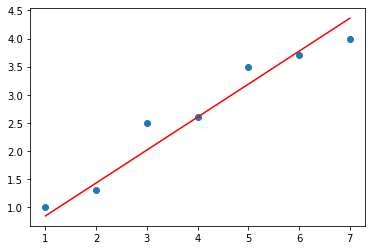

In [17]:
# Draw the regression line
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

## 4. Linear Regression using `Linear Least Squares` Method
- Linear Least Squares is a very basic method used to fit a line if you have only one feature or predictor or independent variable.
- Ordinary Least Square is a specific LLS method, in which works with more than one features or predictors or independent variables

### a. Example 1 (LLS):

In [1]:
import pandas as pd
import numpy as np

from scipy import stats as st
import statistics
import statsmodels as sm

from matplotlib import pyplot as plt
import seaborn as sns

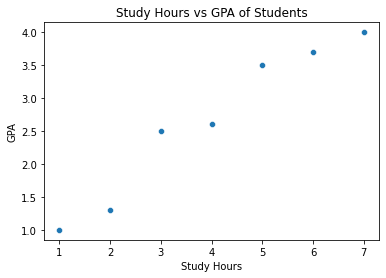

In [2]:
x = np.array([1, 2, 3, 4, 5, 6, 7.])               # study hours 
y = np.array([1.0, 1.3, 2.5, 2.6, 3.5, 3.7, 4.0])   # gpa
# plotting the regression line using regplot
sns.scatterplot(x=x, y=y)
plt.title("Study Hours vs GPA of Students")
plt.xlabel("Study Hours")
plt.ylabel("GPA")
plt.show()

**Regression Equation for this scenario:**

- Let us fit our regression line to these data points. Note we have just one feature/independent/predictor variable and that is the `study hours` and the outcome/dependent/response variable is `gpa`. For this scenario, the line equation is:
    
$$ y = c + mx $$

- In above equation `y` is the outcome/dependent/response variable and `x` is the only feature/independent/predictor variable. `m` is the slope of the line and `c` is the y-intercept. 
- In this scenario, there are only two model parameters (`m` is the slope of the line and `c` is the y-intercept)
- In Machine Learning it is a convention to represent the model parameters with Greek letters Baita. So we represent the model parameter y-intercept as Baita-zero and the model parameter slope as Baita-one:
    - (i) The y-intercept ($\beta_0$)
    - (ii) Slope of line ($\beta_1$)


- So the above, equation can be re-written as regression equation as follows: 

$$ y = \beta_0 + \beta_1 x + \epsilon $$

- The $\epsilon$ term denotes **error**. For a given instance $i$, $\epsilon_i$ is a measure of the difference between the true $y_i$ and the model's estimate, $\hat{y}_i$. If the model predicts $y_i$ perfectly, then $\epsilon_i = \hat{y}_i - y_i  = 0$. 

- Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create a model, we must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict! Our objective is to find the parameters $\beta_0$ and $\beta_1$ that minimize $\epsilon$ across all the available data points. 

**Calculate  $\beta_1$:**

In the case of a model with a single predictor $x$, there is a fairly straightforward **linear least squares** formula we can use to estimate $\beta_1$: 
$$ \hat{\beta}_1 = \frac{\text{cov}(x,y)}{\sigma^2_x} $$

In [4]:
# To find cov(x,y) and var(x), use the covariance matrix
cov_mat = np.cov(x, y)
cov_mat

array([[4.66666667, 2.46666667],
       [2.46666667, 1.36952381]])

In [5]:
beta1 = cov_mat[0,1]/cov_mat[0,0]
beta1

0.5285714285714287

**Calculate  $\beta_0$:**

With $\hat{\beta}_1$ in hand, we can then rearrange the line equation ($y = \beta_0 + \beta_1 x$) to estimate $\beta_0$:
$$ y = \beta_0 + \beta_1 x $$
$$ \beta_0 = y - \beta_1 x  $$

We can use the mean of x and the mean of y for calculating $\hat{\beta_0}$ for all the data points:
$$ \hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x}  $$

In [6]:
beta0 = np.mean(y) - beta1 * np.mean(x)
beta0

0.5428571428571427

**Fit the Line:**

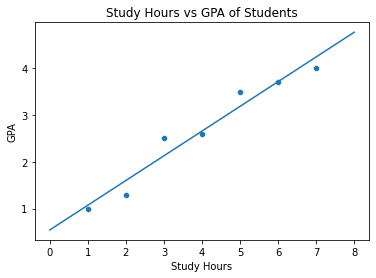

In [7]:
x = np.array([1, 2, 3, 4, 5, 6, 7.])               # study hours 
y = np.array([1.0, 1.3, 2.5, 2.6, 3.5, 3.7, 4.0])   # gpa
sns.scatterplot(x=x, y=y)

xpointsofline = np.linspace(0, 8, 1000)
ypointsofline = beta0 + beta1 * xpointsofline
sns.lineplot(x=xpointsofline, y=ypointsofline)


plt.title("Study Hours vs GPA of Students")
plt.xlabel("Study Hours")
plt.ylabel("GPA")
plt.show()

**Using the Model for Prediction:**
- In regression model terms, if we were provided with `study hours` we can now use the parameter estimates $\hat{\beta}_0$ and $\hat{\beta}_1$ to predict the `GPA` of a student:
$$ \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i $$



- Let us suppose that a student has studied for one and a half hour per day in the entire semester. Can you predict his/her GPA? 

In [8]:
x_i = 1.5

In [9]:
y_i = beta0 + beta1*x_i
y_i

1.3357142857142859

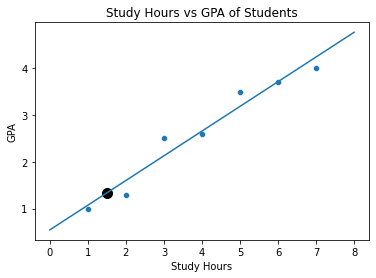

In [10]:
x = np.array([1, 2, 3, 4, 5, 6, 7.])               # study hours 
y = np.array([1.0, 1.3, 2.5, 2.6, 3.5, 3.7, 4.0])   # gpa
sns.scatterplot(x=x, y=y)



xpointsofline = np.linspace(0, 8, 1000)
ypointsofline = beta0 + beta1 * xpointsofline
sns.lineplot(x=xpointsofline, y=ypointsofline)

plt.scatter(x_i, y_i, marker='o',s=100, color='black')

plt.title("Study Hours vs GPA of Students")
plt.xlabel("Study Hours")
plt.ylabel("GPA")
plt.show()

### b. Example 2 (LLS):

In [ ]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7.])                         # Drug dosage in ml
y = np.array([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])   # Level of forgetfullness
sns.scatterplot(x=x, y=y)
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Forgetfulness")
plt.show()

**Regression Equation for this scenario:**

**Calculate  $\beta_1$:**

In the case of a model with a single predictor $x$, there is a fairly straightforward **linear least squares** formula we can use to estimate $\beta_1$: 
$$ \hat{\beta}_1 = \frac{\text{cov}(x,y)}{\sigma^2_x} $$

In [ ]:
# To find cov(x,y) and var(x), use the covariance matrix
cov_mat = np.cov(x, y)
cov_mat

In [ ]:
beta1 = cov_mat[0,1]/cov_mat[0,0]
beta1

**Calculate  $\beta_0$:**

In [ ]:
beta0 = np.mean(y) - beta1 * np.mean(x)
beta0

In [ ]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7.])                         # Drug dosage in ml
y = np.array([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])   # Level of forgetfullness
sns.scatterplot(x=x, y=y)




xpointsofline = np.linspace(0, 7, 1000)
ypointsofline = beta0 + beta1 * xpointsofline
sns.lineplot(x=xpointsofline, y=ypointsofline)


plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Forgetfulness")
plt.show()



In regression model terms, if we were provided with `drug dosage` we can now use the parameter estimates $\hat{\beta}_0$ and $\hat{\beta}_1$ to predict the `forgetfullness` of a patient:
$$ \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i $$

In [ ]:
x_i = 4

In [ ]:
y_i = beta0 + beta1*x_i
y_i

In [ ]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7.])                         # Drug dosage in ml
y = np.array([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])   # Level of forgetfullness
sns.scatterplot(x=x, y=y)

xpointsofline = np.linspace(0, 7, 1000)
ypointsofline = beta0 + beta1 * xpointsofline
sns.lineplot(x=xpointsofline, y=ypointsofline)

plt.scatter(x_i, y_i, marker='o',s=100, color='black')

plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Forgetfulness")
plt.grid(True)
plt.show()



### b. Example 3 (LLS):
With data from female Adélie penguins, create a linear least squares model that predicts body mass with flipper length. Predict the mass of a female Adélie penguin that has a flipper length of 197mm.

In [18]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [19]:
np.unique(penguins.species, return_counts=True)

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array([152,  68, 124], dtype=int64))

In [20]:
adelie = penguins[penguins.species == 'Adelie']
adelie.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [21]:
x = adelie[adelie.sex == 'Female']['flipper_length_mm'].to_numpy()
y = adelie[adelie.sex == 'Female']['body_mass_g'].to_numpy()/1000

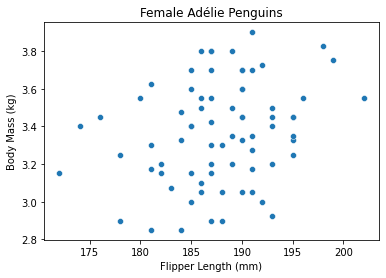

In [22]:
sns.scatterplot(x=x, y=y)
plt.title("Female Adélie Penguins")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (kg)")
plt.show();

**Calculate  $\beta_1$:**

In the case of a model with a single predictor $x$, there is a fairly straightforward **linear least squares** formula we can use to estimate $\beta_1$: 
$$ \hat{\beta}_1 = \frac{\text{cov}(x,y)}{\sigma^2_x} $$

In [23]:
cov_mat = np.cov(x, y)
cov_mat

array([[31.304414  ,  0.3962852 ],
       [ 0.3962852 ,  0.07256564]])

In [24]:
beta1 = cov_mat[0,1]/cov_mat[0,0]
beta1

0.012659083726357767

**Calculate  $\beta_0$:**

With $\hat{\beta}_1$ in hand, we can then rearrange the line equation ($y = \beta_0 + \beta_1 x$) to estimate $\beta_0$:
$$ y = \beta_0 + \beta_1 x $$
$$ \beta_0 = y - \beta_1 x  $$

We can use the mean of x and the mean of y for calculating $\hat{\beta_0}$ for all the data points:
$$ \hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x}  $$

In [25]:
beta0 = y.mean() - beta1*x.mean()
beta0

0.9915290574707036

**Fit the Line:**

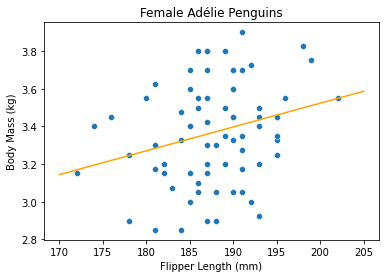

In [26]:
sns.scatterplot(x=x, y=y)

xline = np.linspace(170, 205, 1000)
yline = beta0 + beta1*xline
sns.lineplot(x=xline, y=yline, color='orange')

plt.title("Female Adélie Penguins")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (kg)")
plt.show();

**Using the Model for Prediction:**
- In regression model terms, if we were provided with `flipper length` we can now use the parameter estimates $\hat{\beta}_0$ and $\hat{\beta}_1$ to predict the `body mass` of a penguin:
$$ \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i $$



- Let us suppose that the `flipper length` of a  penguin is 175 mm. Can you predict its `body mass`? 

In [27]:
x_i = 175

In [28]:
y_i = beta0 + beta1*x_i
y_i

3.206868709583313

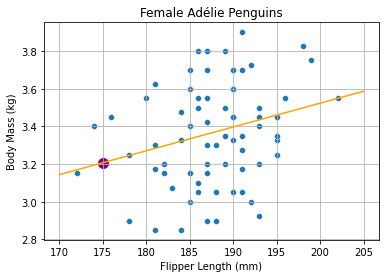

In [29]:
sns.scatterplot(x=x, y=y)

xline = np.linspace(170, 205, 1000)
yline = beta0 + beta1*xline
sns.lineplot(x=xline, y=yline, color='orange')

plt.title("Female Adélie Penguins")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (kg)")


plt.scatter(x_i, y_i, marker='o', s=100, color='purple');
plt.grid(True)
plt.show();